In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
import seaborn as sns

## Reading and Summarising meta data

In [4]:
df = pd.read_csv('../data/Survival_SupplementalTable_S1_20171025_xena_sp', sep='\t', index_col=0)
df = df.rename(columns={'_PATIENT': 'bcr_patient_barcode'})

In [5]:
summary_table = pd.DataFrame(columns=['Cancer Type', 'No. of Cases', 'Age (Mean ± SD)', 'Gender M/F', 'Race White/Black/Other/NA', 'Stage 0/I/II/III/IV/NA', 'Grade 1/2/3/4/NA'])

# Group by Cancer Type
grouped = df.groupby('cancer type abbreviation')

df_list = []

# Iterate over the groups
for cancer_type, group in grouped:
    new_row = pd.DataFrame({
        'Cancer Type': [cancer_type],
        'No. of Cases': [len(group)],
        'Age (Mean ± SD)': [f"{group['age_at_initial_pathologic_diagnosis'].mean():.2f} ± {group['age_at_initial_pathologic_diagnosis'].std():.2f}"],
        'Gender M/F': ['/'.join([f"{gender} {len(subgroup)}" for gender, subgroup in group.groupby('gender')])],
        'Race White/Black/Other/NA': ['/'.join([f"{race} {len(subgroup)}" for race, subgroup in group.groupby('race')])],
        'Stage 0/I/II/III/IV/NA': ['/'.join([f"Stage {stage} {len(subgroup)}" for stage, subgroup in group.groupby('ajcc_pathologic_tumor_stage')])],
        'Grade 1/2/3/4/NA': ['/'.join([f"Grade {grade} {len(subgroup)}" for grade, subgroup in group.groupby('histological_grade')])]
    })
    df_list.append(new_row)

# Concatenate the DataFrames
summary_table = pd.concat(df_list, ignore_index=True)

print(summary_table)
summary_table.to_csv("../data/Summary.csv")

   Cancer Type  No. of Cases Age (Mean ± SD)           Gender M/F  \
0          ACC            92   47.16 ± 16.30    FEMALE 60/MALE 32   
1         BLCA           436   68.14 ± 10.62  FEMALE 119/MALE 317   
2         BRCA          1236   58.19 ± 13.40  FEMALE 1223/MALE 13   
3         CESC           312   48.27 ± 13.76           FEMALE 312   
4         CHOL            45   64.56 ± 12.46    FEMALE 23/MALE 22   
5         COAD           545   67.42 ± 13.07  FEMALE 261/MALE 284   
6         DLBC            48   56.27 ± 13.95    FEMALE 26/MALE 22   
7         ESCA           204   62.99 ± 11.92   FEMALE 33/MALE 171   
8          GBM           602   57.65 ± 14.40  FEMALE 234/MALE 368   
9         HNSC           604   61.00 ± 11.92  FEMALE 164/MALE 440   
10        KICH            91   52.22 ± 14.13    FEMALE 39/MALE 52   
11        KIRC           944   60.84 ± 12.07  FEMALE 327/MALE 617   
12        KIRP           352   61.77 ± 12.15   FEMALE 95/MALE 257   
13        LAML           200   55.

## Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


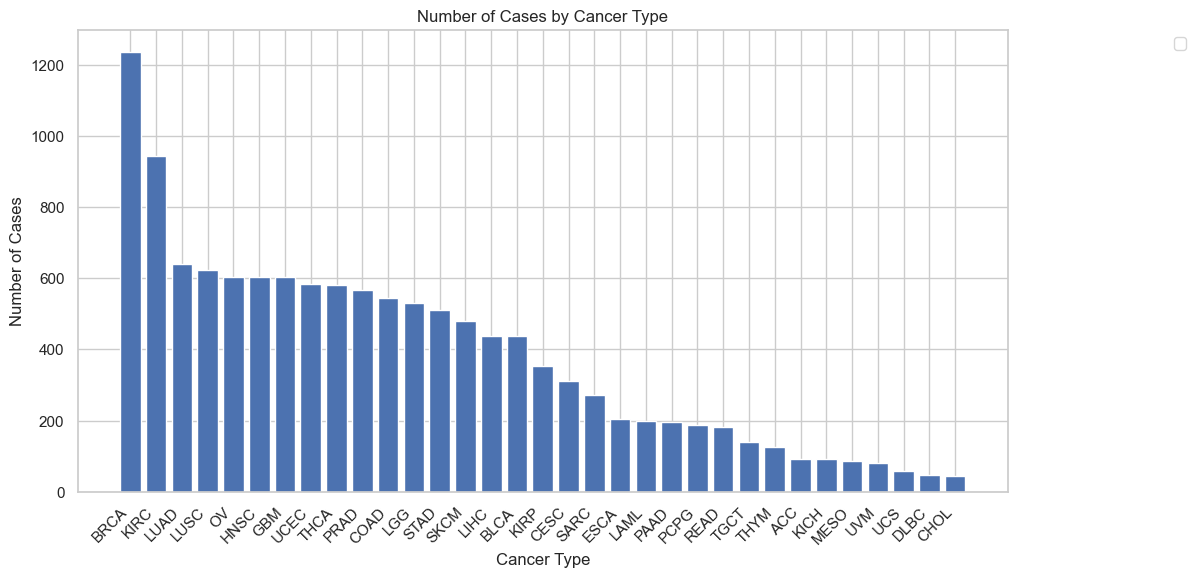

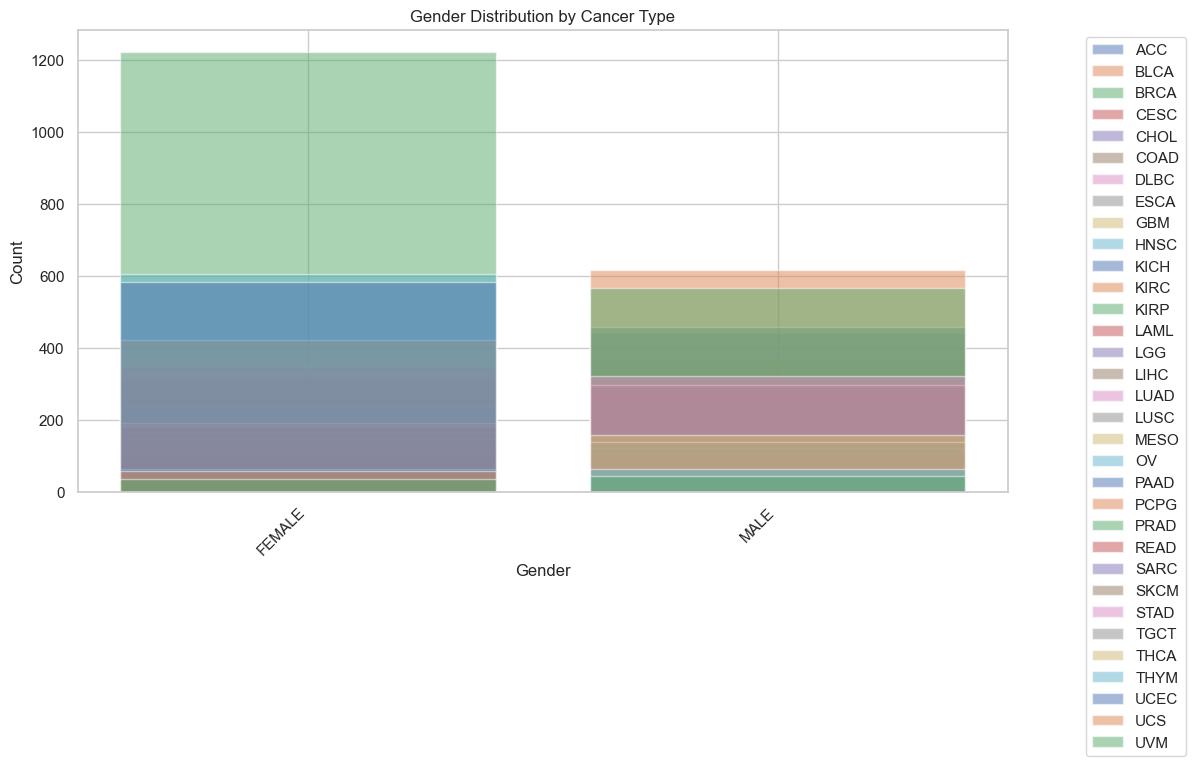

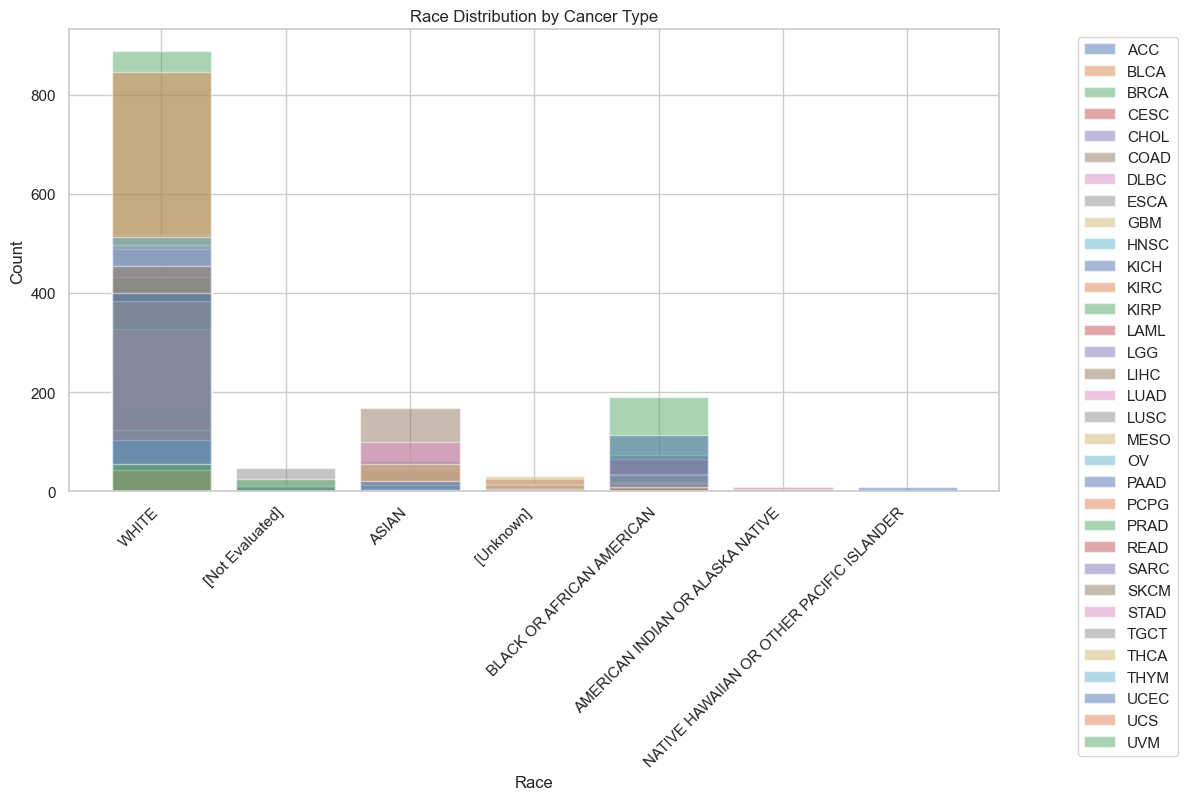

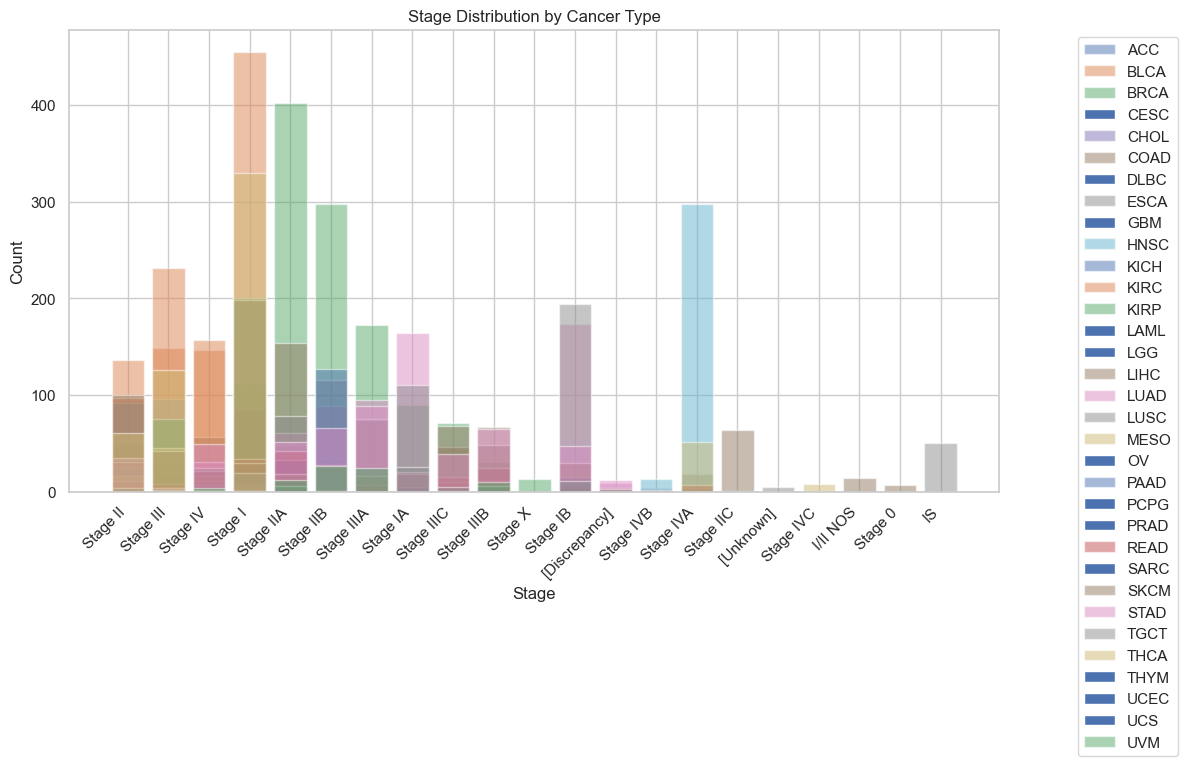

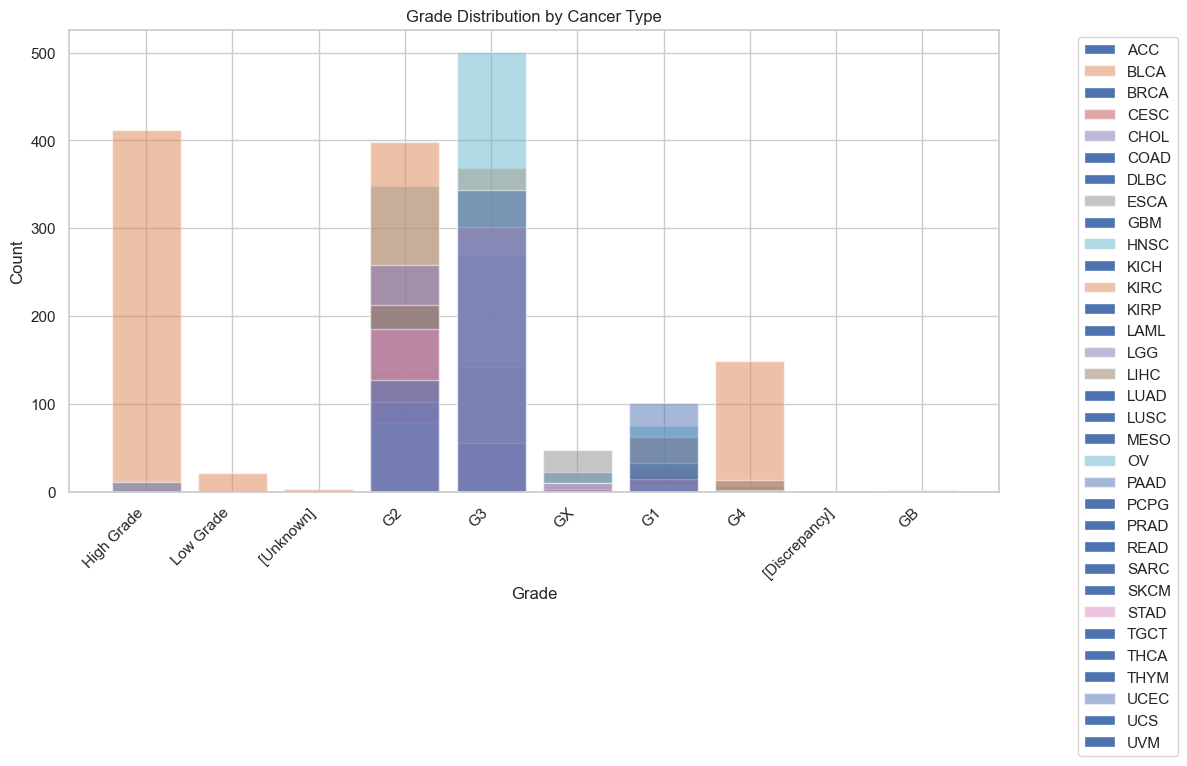

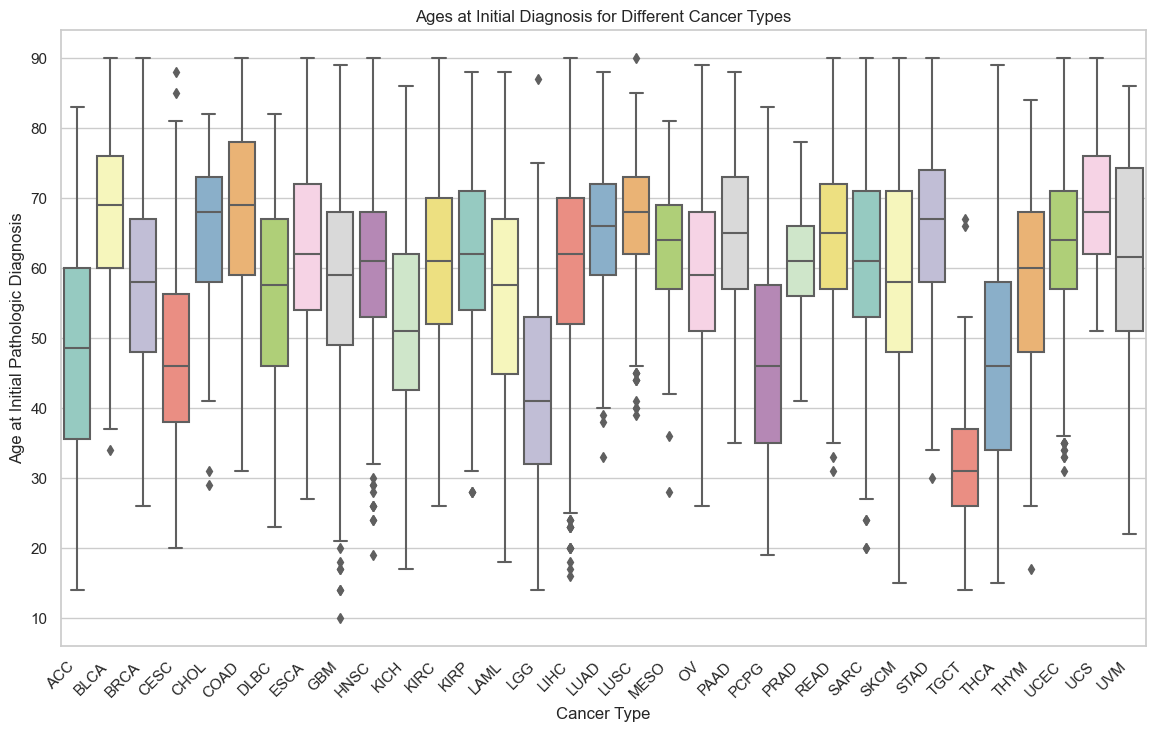

In [16]:
plt.figure(figsize=(12, 6))
sorted_table = summary_table.sort_values(by='No. of Cases', ascending=False)
plt.bar(sorted_table['Cancer Type'], sorted_table['No. of Cases'])
plt.title('Number of Cases by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.savefig('../metadata_summary_plots/num_cases_by_cancer_type.png')


plt.figure(figsize=(12, 6))
for _, row in summary_table.iterrows():
    gender_data = df[df['cancer type abbreviation'] == row['Cancer Type']]['gender']
    gender_counts = gender_data.value_counts()
    plt.bar(gender_counts.index, gender_counts.values, label=row['Cancer Type'], alpha=0.5)

plt.title('Gender Distribution by Cancer Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.savefig('../metadata_summary_plots/gen_dist_by_cancer_type.png')


plt.figure(figsize=(12, 6))
for _, row in summary_table.iterrows():
    race_data = df[df['cancer type abbreviation'] == row['Cancer Type']]['race']
    race_counts = race_data.value_counts()
    plt.bar(race_counts.index, race_counts.values, label=row['Cancer Type'], alpha=0.5)

plt.title('Race Distribution by Cancer Type')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.savefig('../metadata_summary_plots/race_dist_by_cancer_type.png')


plt.figure(figsize=(12, 6))
for _, row in summary_table.iterrows():
    stage_data = df[df['cancer type abbreviation'] == row['Cancer Type']]['ajcc_pathologic_tumor_stage']
    stage_counts = stage_data.value_counts()
    plt.bar(stage_counts.index, stage_counts.values, label=row['Cancer Type'], alpha=0.5)

plt.title('Stage Distribution by Cancer Type')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.savefig('../metadata_summary_plots/stage_dist_by_cancer_type.png')


plt.figure(figsize=(12, 6))
for _, row in summary_table.iterrows():
    grade_data = df[df['cancer type abbreviation'] == row['Cancer Type']]['histological_grade']
    grade_counts = grade_data.value_counts()
    plt.bar(grade_counts.index, grade_counts.values, label=row['Cancer Type'], alpha=0.5)

plt.title('Grade Distribution by Cancer Type')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.savefig('../metadata_summary_plots/grade_dist_by_cancer_type.png')


sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.boxplot(x='cancer type abbreviation', y='age_at_initial_pathologic_diagnosis', data=df, palette='Set3')
plt.title('Ages at Initial Diagnosis for Different Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Age at Initial Pathologic Diagnosis')
plt.xticks(rotation=45, ha='right')
plt.savefig('../metadata_summary_plots/age_dist_by_cancer_type.png')


# Pathway Analysis

### Reading the scores corresponding to different gene sets (pathways) and combining it with the metadata

In [7]:
df2 = pd.read_table("../data/ssGSEA_1387GeneSets.txt",sep="\t")
df3 = pd.merge(df2, df, on="bcr_patient_barcode")
df3.rename(columns={'race_y': 'race', 'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)
df3.to_csv("../data/merged_data.csv")

/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_71904/3832998173.py:1: DtypeWarning: Columns (1419) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_table("../data/ssGSEA_1387GeneSets.txt",sep="\t")


## Finding the top 3 upregulated and top 3 downregulated genes for each of the five most common cancers

In [8]:
cancer_types_to_evaluate = ['BRCA', 'GBM', 'OV', 'UCEC', 'KIRC', 'HNSC']
gene_set_columns = df3.columns[1:1388]

def get_top3_upregulated_downregulated_pathways(cancer_type, df3, n=3):
    cancer_data = df3[df3['cancer type abbreviation'] == cancer_type]
    gene_set_data = cancer_data[gene_set_columns]
    mean_expression = gene_set_data.mean()
    return (mean_expression.nlargest(n).index, mean_expression.nsmallest(n).index) if n < len(mean_expression) else (mean_expression.index, mean_expression.index)


In [9]:
cancer_pathways_map = {}

for cancer_type in cancer_types_to_evaluate:
    upregulated, downregulated = get_top3_upregulated_downregulated_pathways(cancer_type, df3)
    cancer_pathways_map[cancer_type] = (upregulated, downregulated)

## Using K-M estimate to estimate the survival curve

In [10]:
def plot_survival_curve(upregulated_pathways, downregulated_pathways, cancer_type, img_path):
    cancer_data = df3[df3['cancer type abbreviation'] == cancer_type]
    survival_columns = [ 'bcr_patient_barcode','OS', 'OS.time']
    survival_data = cancer_data[survival_columns]
    
    gene_set_data = cancer_data[gene_set_columns]
    survival_data = pd.concat([survival_data.reset_index(drop=True), gene_set_data.reset_index(drop=True)], axis=1)
    survival_data= survival_data.dropna()  

    fig, ax = plt.subplots(figsize=(15, 8))

    kmf = KaplanMeierFitter()

    T = survival_data['OS.time']
    E = survival_data['OS']

    #Baseline
    kmf.fit(durations=T, event_observed=E, label='Baseline')
    kmf.plot(ax=ax)

    #Upregulated
    for gene_set in upregulated_pathways:
        mask = survival_data[gene_set] > 0
        kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'], label=f'Upregulated: {gene_set}')
        kmf.plot(ax=ax) 

    #Downregulated
    for gene_set in downregulated_pathways:
        mask = survival_data[gene_set] < 0
        kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'], label=f'Downregulated: {gene_set}')
        kmf.plot(ax=ax)
    
    ax.set_title(f'Survival Curve for {cancer_type}')
    ax.set_xlabel('Time (Days)')
    ax.set_ylabel('Survival Probability')

    ax.legend(title="Gene Sets", bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0, fontsize='medium', ncol=1)
    plt.savefig(img_path)


Top 3 upregulated pathways for BRCA : Index(['Vitamin_B2_(riboflavin)_metabolism',
       'Mtb_iron_assimilation_by_chelation', 'Keratan_sulfate_degradation'],
      dtype='object')
Top 3 downregulated pathways for BRCA : Index(['Metabolism_of_polyamines', 'Abnormal_metabolism_in_phenylketonuria',
       'Fructose_catabolism'],
      dtype='object') 

Top 3 upregulated pathways for GBM : Index(['Synthesis_of_PC', 'Neurotransmitter_Clearance_In_The_Synaptic_Cleft',
       'GABA_B_receptor_activation'],
      dtype='object')
Top 3 downregulated pathways for GBM : Index(['Purine_ribonucleoside_monophosphate_biosynthesis',
       'Apoptotic_execution__phase', 'Vitamin_B2_(riboflavin)_metabolism'],
      dtype='object') 

Top 3 upregulated pathways for OV : Index(['G2_Phase',
       'Phosphorylation_of_proteins_involved_in_the_G2/M_transition_by_Cyclin_A_Cdc2_complexes',
       'p53-Independent_DNA_Damage_Response'],
      dtype='object')
Top 3 downregulated pathways for OV : Index(['Hydrol

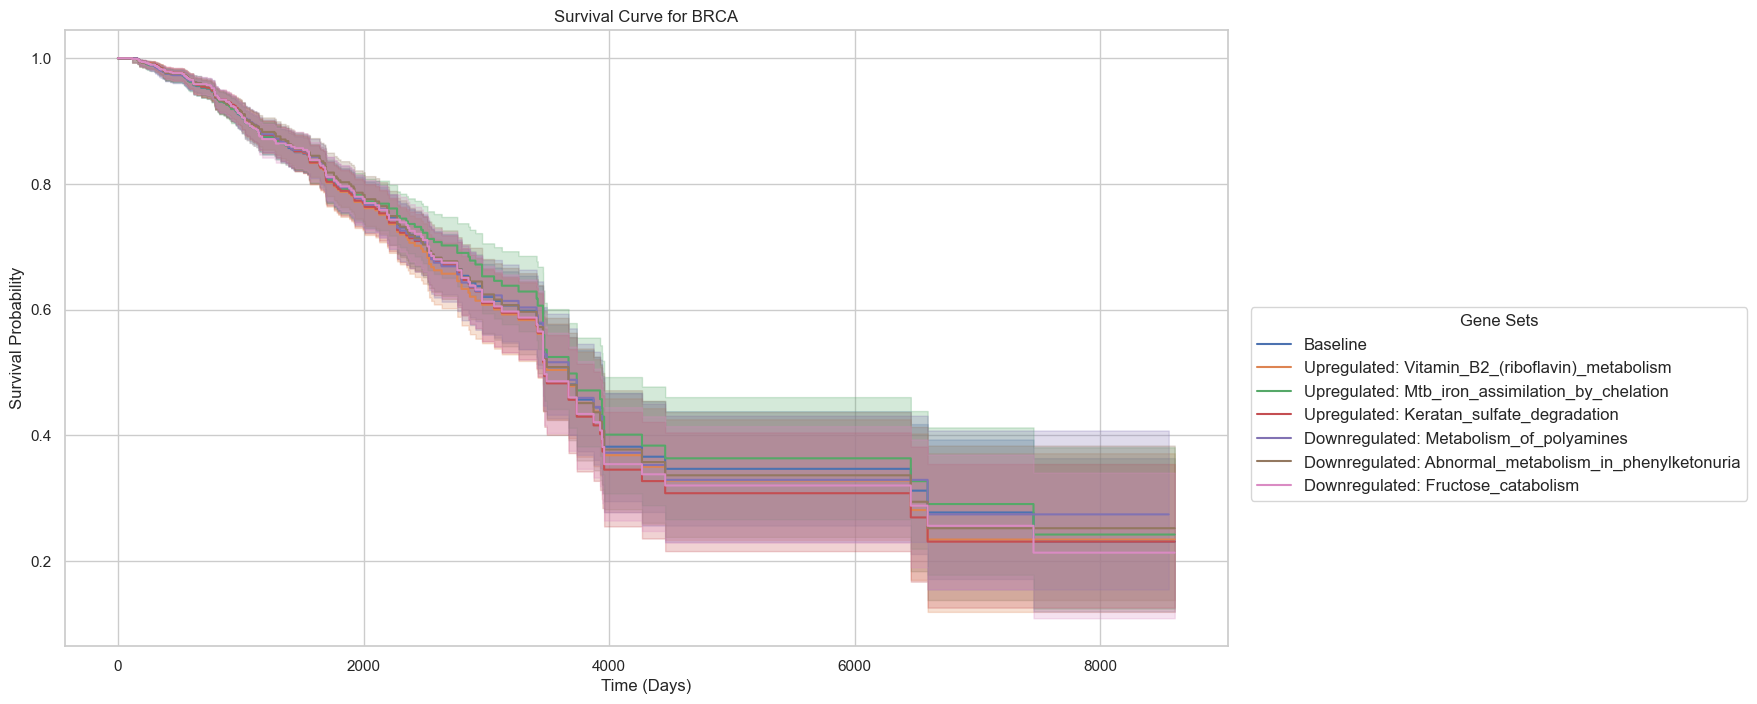

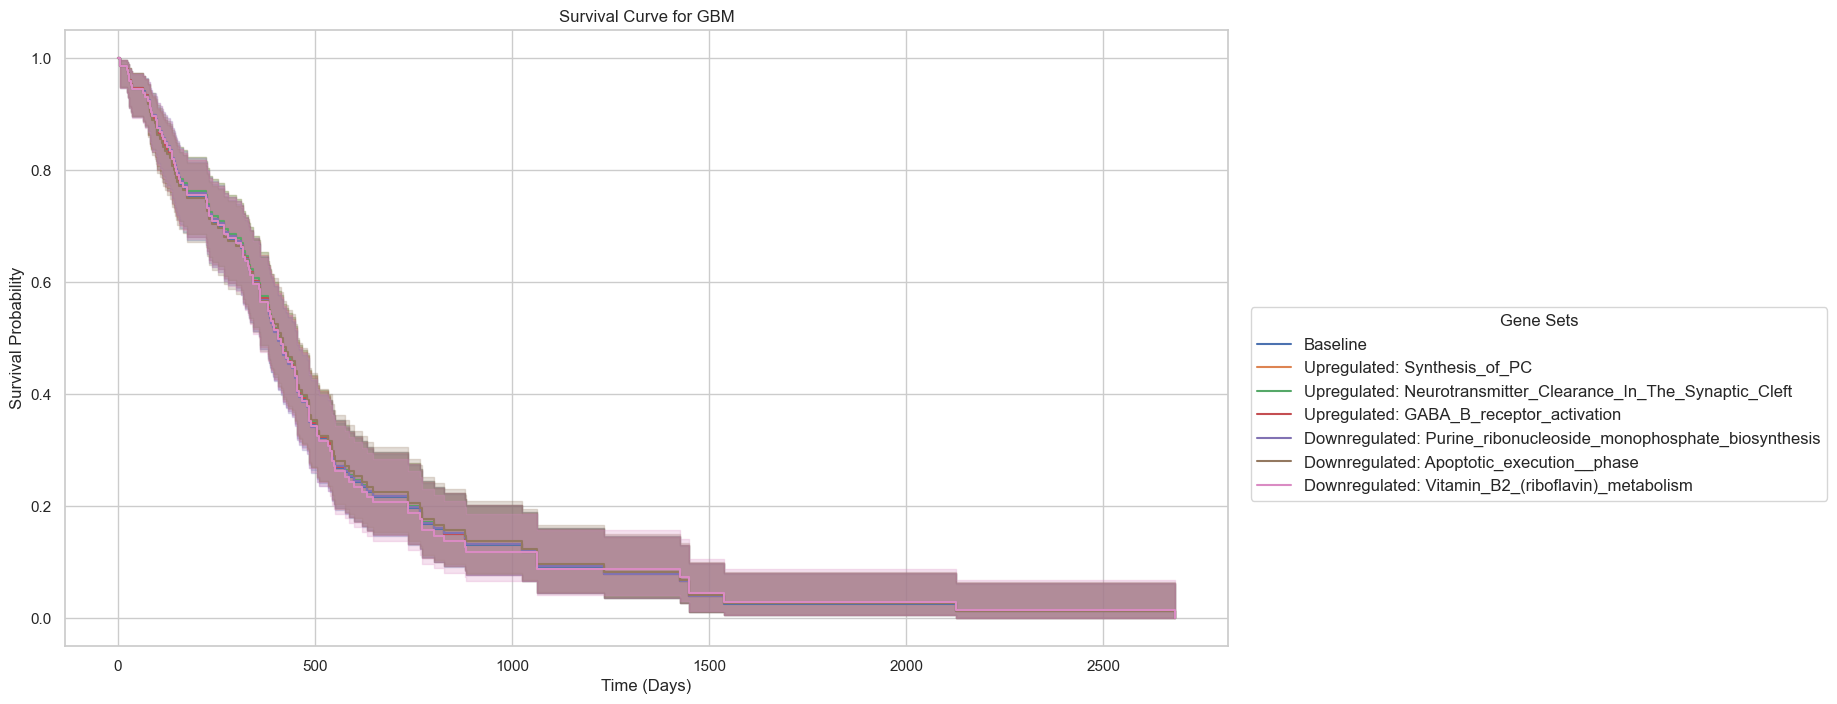

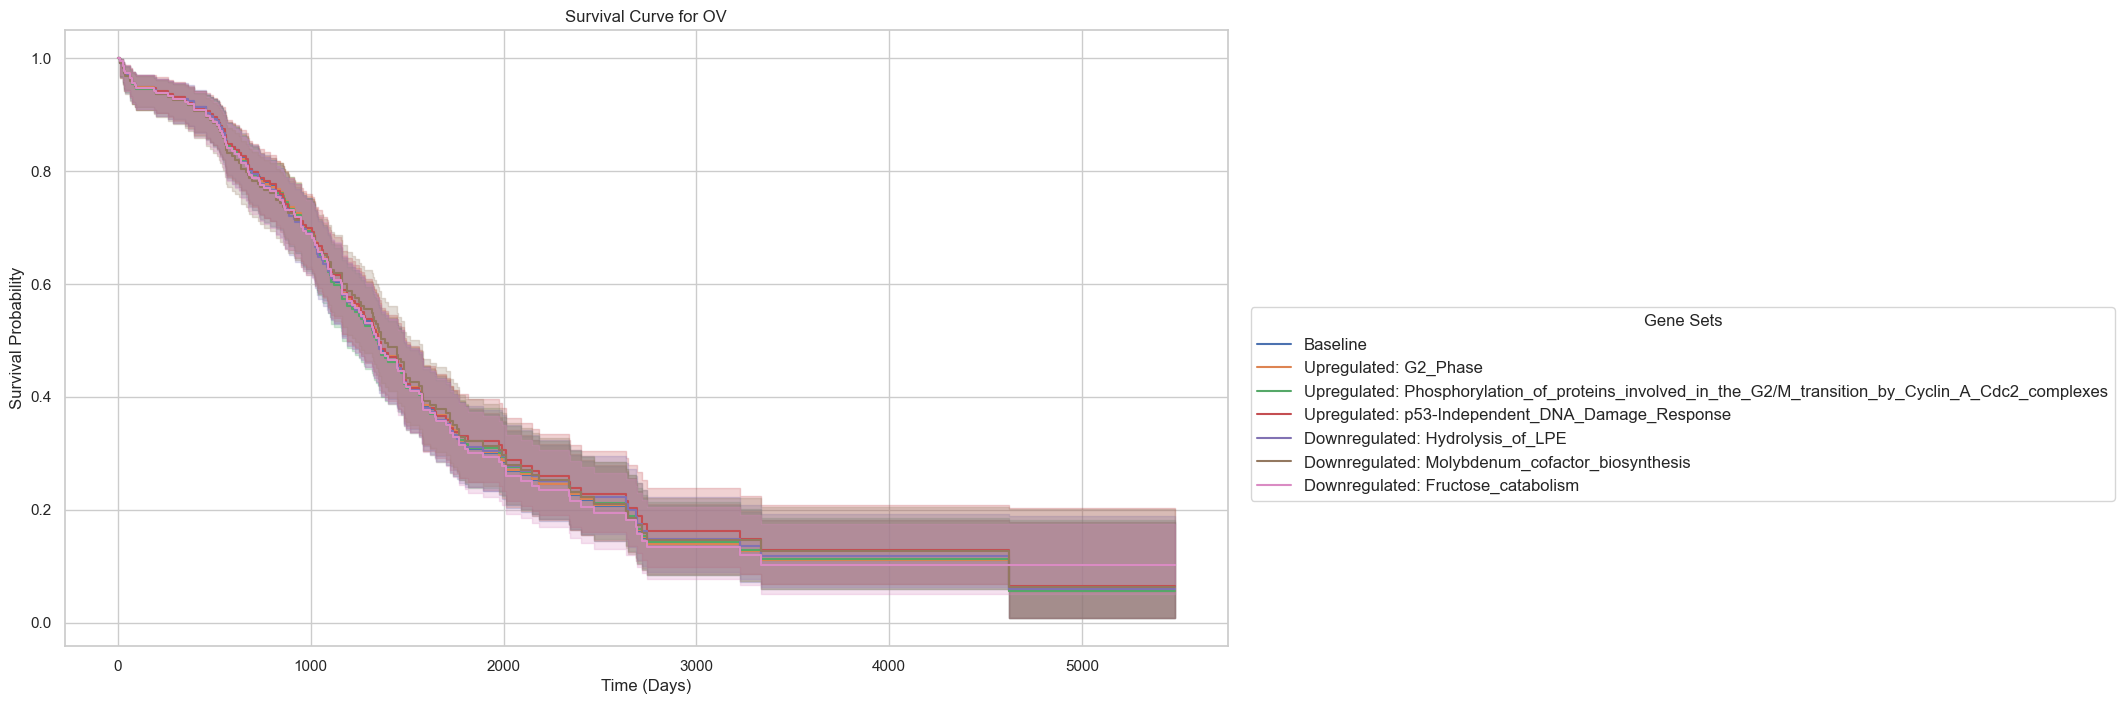

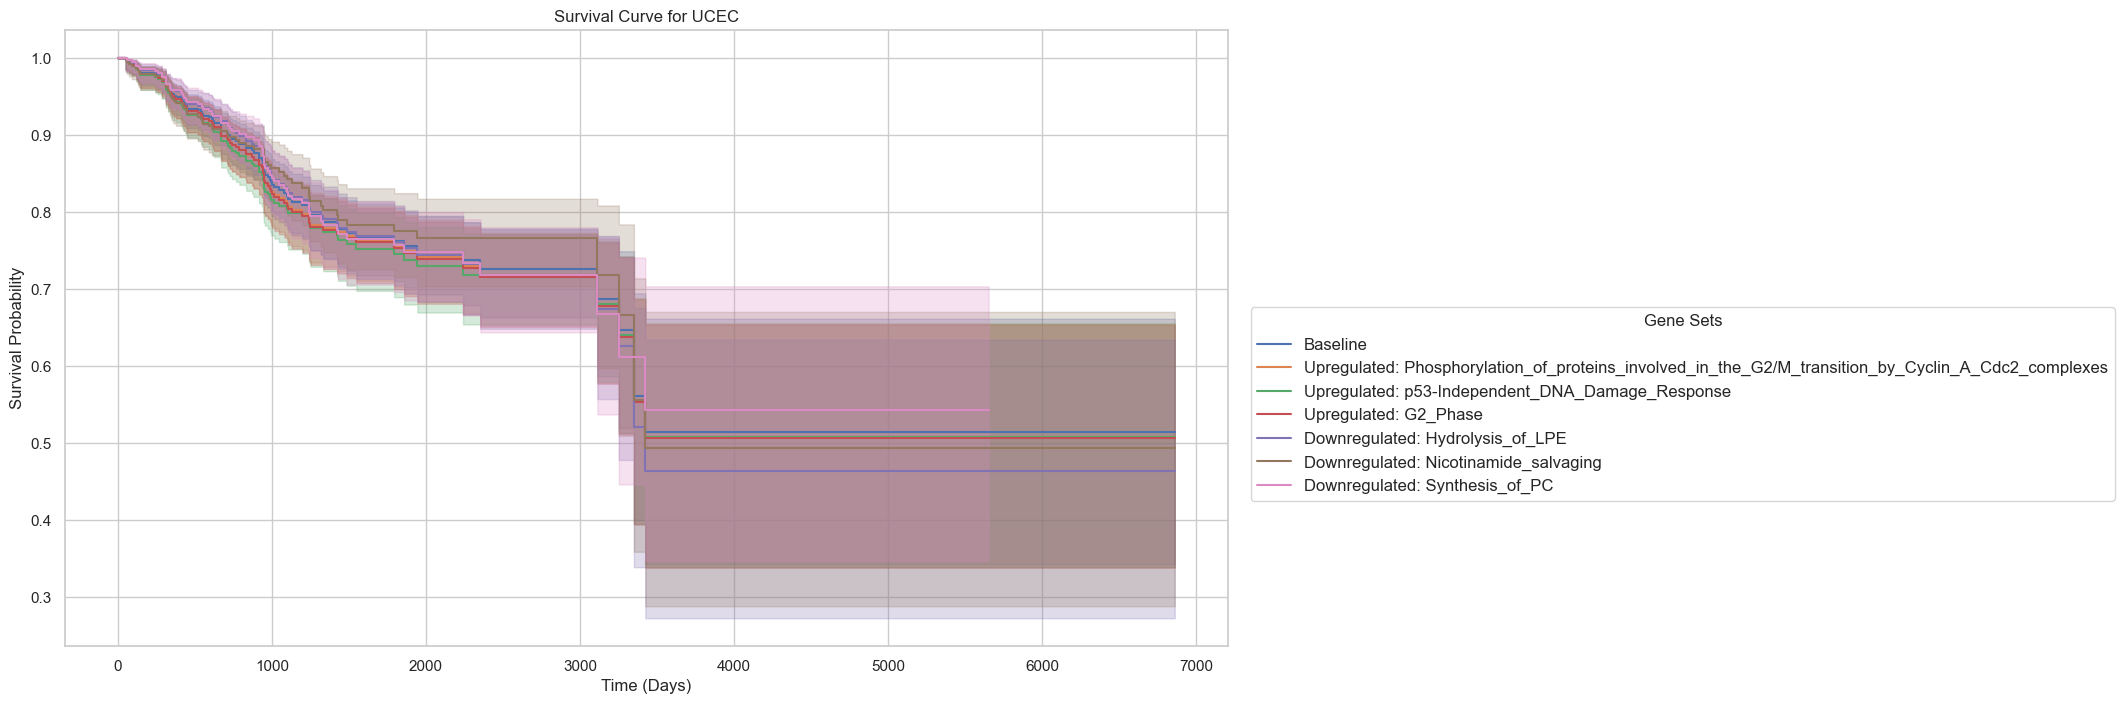

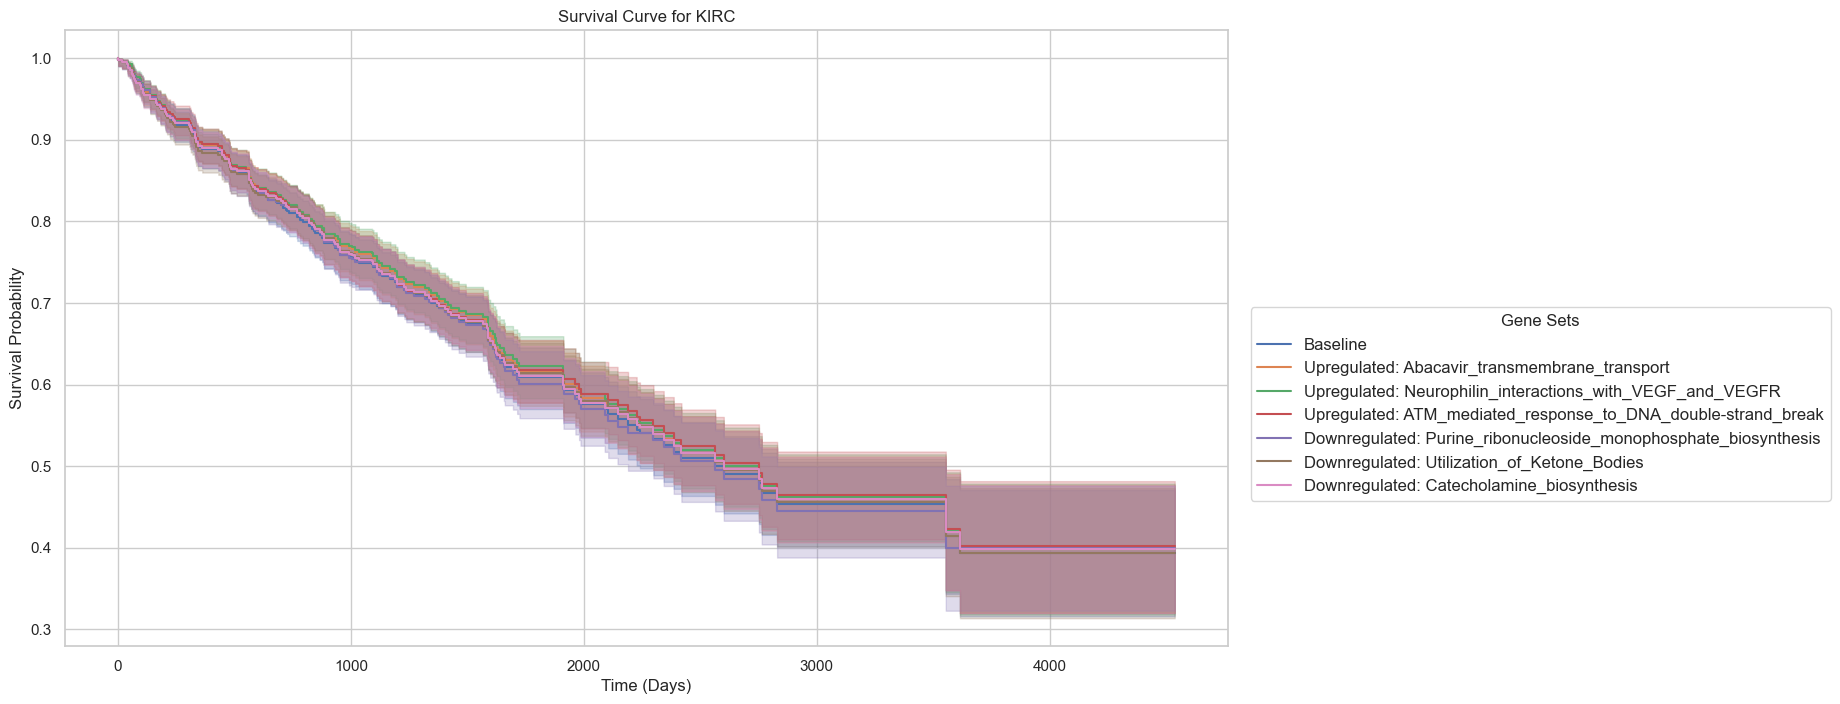

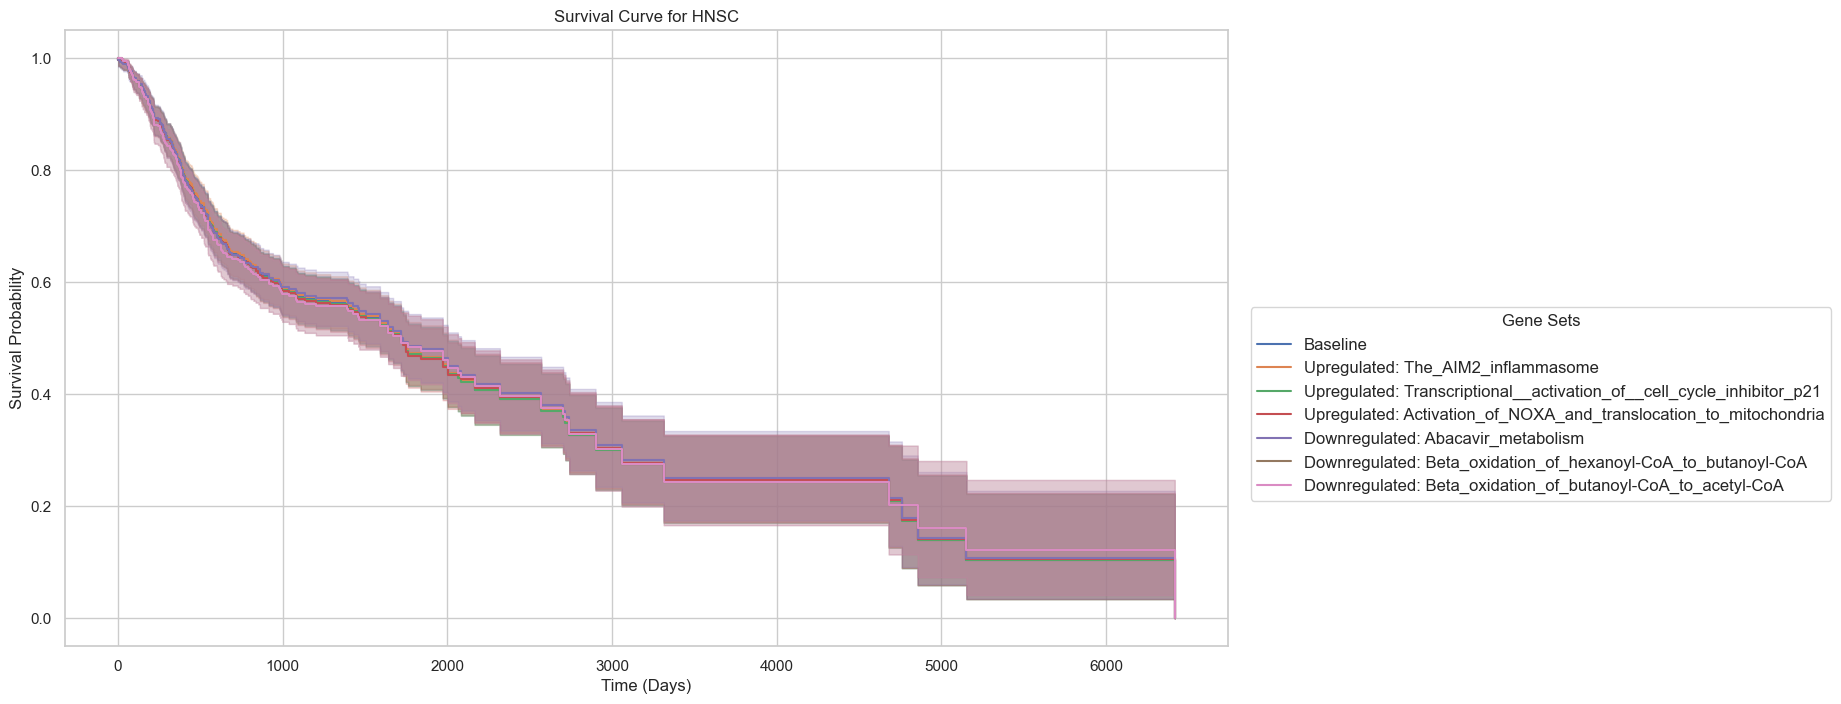

In [11]:
for cancer_type in cancer_types_to_evaluate:
    
    upregulated_pathways, downregulated_pathways = cancer_pathways_map[cancer_type]
    print("Top 3 upregulated pathways for", cancer_type, ":", upregulated_pathways)
    print("Top 3 downregulated pathways for", cancer_type, ":", downregulated_pathways, "\n")
    
    plot_survival_curve(upregulated_pathways, downregulated_pathways, cancer_type, f'../km_survival_curves/{cancer_type}_survival.png')

## Performing Cox regression on the worst pathway out of the 6 (top3 upregulated and top3 downregulated) obtained.

In [12]:
def get_worst_pathway(survival_data, top_upregulated, top_downregulated):

    kmf = KaplanMeierFitter()
    kmf.fit(durations=survival_data['OS.time'], event_observed=survival_data['OS'])
    median_survival_time = survival_data['OS.time'].median()

    cumulative_hazard_at_median_time = {}

    # Group 1: Baseline
    cumulative_hazard_at_median_time['No Regulation'] = 1.0 - kmf.survival_function_.loc[kmf.survival_function_.index.to_series().sub(median_survival_time).abs().idxmin()].iloc[0]

    # Group 2: Upregulated gene sets
    for gene_set in top_upregulated:
        mask = survival_data[gene_set] > 0
        kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'])
        closest_time_point = kmf.survival_function_.index.to_series().sub(median_survival_time).abs().idxmin()
        cumulative_hazard_at_median_time[gene_set] = 1.0 - kmf.survival_function_.loc[closest_time_point].iloc[0]

    # Group 3: Downregulated gene sets
    for gene_set in top_downregulated:
        mask = survival_data[gene_set] < 0
        kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'])
        closest_time_point = kmf.survival_function_.index.to_series().sub(median_survival_time).abs().idxmin()
        cumulative_hazard_at_median_time[gene_set] = 1.0 - kmf.survival_function_.loc[closest_time_point].iloc[0]

    # Find the pathway with the highest cumulative hazard at the median survival time and return pathway, hazard
    worst_outcome_pathway = max(cumulative_hazard_at_median_time, key=cumulative_hazard_at_median_time.get)
    max_cumulative_hazard = cumulative_hazard_at_median_time[worst_outcome_pathway]

    return worst_outcome_pathway, max_cumulative_hazard

In [13]:
def cox_regression_on_worst_pathway(cancer_type, df3, n=3):
    
    cancer_data = df3[df3['cancer type abbreviation'] == cancer_type]

    survival_columns = ['bcr_patient_barcode', 'OS', 'OS.time']

    survival_data = cancer_data[survival_columns]
    gene_set_data = cancer_data[gene_set_columns]

    survival_data = pd.concat([survival_data.reset_index(drop=True), gene_set_data.reset_index(drop=True)], axis=1)
    survival_data= survival_data.dropna()

    #get top 3 upregulated and downregulated pathways
    top_upregulated_gene_sets, top_downregulated_gene_sets = get_top3_upregulated_downregulated_pathways(cancer_type, df3, n)

    worst_pathway, cumulative_hazard = get_worst_pathway(survival_data, top_upregulated_gene_sets, top_downregulated_gene_sets)
    print("For {} cancer, the worst pathway is {} with cumulative hazard {}".format(cancer_type, worst_pathway, cumulative_hazard))

    if worst_pathway == 'No Regulation':
        print("Baseline is worse than any of the 6 chosen pathways".format(cancer_type))
        return

    #plot cox regression graph for this pathway
    min_val = cancer_data[worst_pathway].min()
    max_val = cancer_data[worst_pathway].max()
    avg_val = cancer_data[worst_pathway].mean()
    
    survival_columns = ['OS', 'OS.time', worst_pathway]
    survival_data = cancer_data[survival_columns]

    survival_data = survival_data.dropna(subset=['OS', 'OS.time', worst_pathway])
    cph = CoxPHFitter()
    cph.fit(survival_data, duration_col='OS.time', event_col='OS' )
    cph.print_summary()
    
    fig, ax = plt.subplots(figsize=(15, 8))
    cph.plot_covariate_groups(worst_pathway, [min_val, avg_val, max_val], ax=ax)
    ax.set_title(f'Cox regression for {worst_pathway} in {cancer_type}')
    ax.set_xlabel('Days')
    ax.set_ylabel('Survival Probability')
    plt.tight_layout()
    plt.savefig(f'../cox_regression_plots/{cancer_type}_worst_pathway.png', dpi=600)

Cancer Type: BRCA 

For BRCA cancer, the worst pathway is Mtb_iron_assimilation_by_chelation with cumulative hazard 0.07730850398703759


<lifelines.CoxPHFitter: fitted with 1200 total observations, 1003 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1200
number of events observed = 197
   partial log-likelihood = -1131.48
         time fit was run = 2023-11-24 17:01:51 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
Mtb_iron_assimilation_by_chelation  -0.65       0.52       0.27            -1.18            -0.13                 0.31                 0.88

                                     cmp to     z    p   -log2(p)
covariate                                                        
Mtb_iron_assimilation_by_chelation     0.00 -2.44 0.01       6.11
---
Concordance = 0.53
Partial AIC = 2264.96
log-likelihood ratio test = 5.34 on 1 df
-log2(p) of ll-ratio test = 5.58

Cancer Type: GBM 

For GBM cancer, the worst pathway is Vitamin_B2_(riboflavin)_metabolism with cumulative hazard 0.4031482038537585


<lifelines.CoxPHFitter: fitted with 153 total observations, 31 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 153
number of events observed = 122
   partial log-likelihood = -489.73
         time fit was run = 2023-11-24 17:01:52 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
Vitamin_B2_(riboflavin)_metabolism  -0.28       0.76       0.50            -1.26             0.70                 0.28                 2.02

                                     cmp to     z    p   -log2(p)
covariate                                                        
Vitamin_B2_(riboflavin)_metabolism     0.00 -0.55 0.58       0.79
---
Concordance = 0.56
Partial AIC = 981.46
log-likelihood ratio test = 0.32 on 1 df
-log2(p) of ll-ratio test = 0.81

Cancer Type: OV 

For OV cancer, the worst pathway is Fructose_catabolism with cumulative hazard 0.29909544966241175


<lifelines.CoxPHFitter: fitted with 256 total observations, 105 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 256
number of events observed = 151
   partial log-likelihood = -688.70
         time fit was run = 2023-11-24 17:01:54 UTC

---
                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                   
Fructose_catabolism  -0.31       0.73       0.35            -1.00             0.37                 0.37                 1.45

                      cmp to     z    p   -log2(p)
covariate                                         
Fructose_catabolism     0.00 -0.90 0.37       1.43
---
Concordance = 0.56
Partial AIC = 1379.40
log-likelihood ratio test = 0.85 on 1 df
-log2(p) of ll-ratio test = 1.49

Cancer Type: UCEC 

For UCEC cancer, the worst pathway is p53-Independent_DNA_Damage_Response with cumulative hazard 0.1474995253897604


<lifelines.CoxPHFitter: fitted with 555 total observations, 461 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 555
number of events observed = 94
   partial log-likelihood = -522.57
         time fit was run = 2023-11-24 17:01:55 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
p53-Independent_DNA_Damage_Response   1.61       5.00       0.67             0.29             2.93                 1.33                18.73

                                      cmp to    z    p   -log2(p)
covariate                                                        
p53-Independent_DNA_Damage_Response     0.00 2.39 0.02       5.88
---
Concordance = 0.56
Partial AIC = 1047.15
log-likelihood ratio test = 7.63 on 1 df
-log2(p) of ll-ratio test = 7.44

Cancer Type: KIRC 

For KIRC cancer, the worst pathway is No Regulation with cumulative hazard 0.28023006660473304
Baseline is worse than any of the 6 chosen pathways
Cancer Type: HNSC 

For HNSC cancer, the worst pathway is Beta_oxidation_of_hexanoyl-CoA_to_butanoyl-CoA with cumulative hazard 0.3500046794426551


<lifelines.CoxPHFitter: fitted with 583 total observations, 323 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 583
number of events observed = 260
   partial log-likelihood = -1454.81
         time fit was run = 2023-11-24 17:01:57 UTC

---
                                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                              
Beta_oxidation_of_hexanoyl-CoA_to_butanoyl-CoA  -0.30       0.74       0.26            -0.81             0.21                 0.45                 1.23

                                                 cmp to     z    p   -log2(p)
covariate                                                                    
Beta_oxidation_of_hexanoyl-CoA_to_butanoyl-CoA     0.00 -1.15 0.25       2.01
---
Concordance = 0.53
Partial AIC = 2911.63
log-likelihood ratio test = 1.37 on 1 df
-log2(p) of ll-ratio test = 2.05

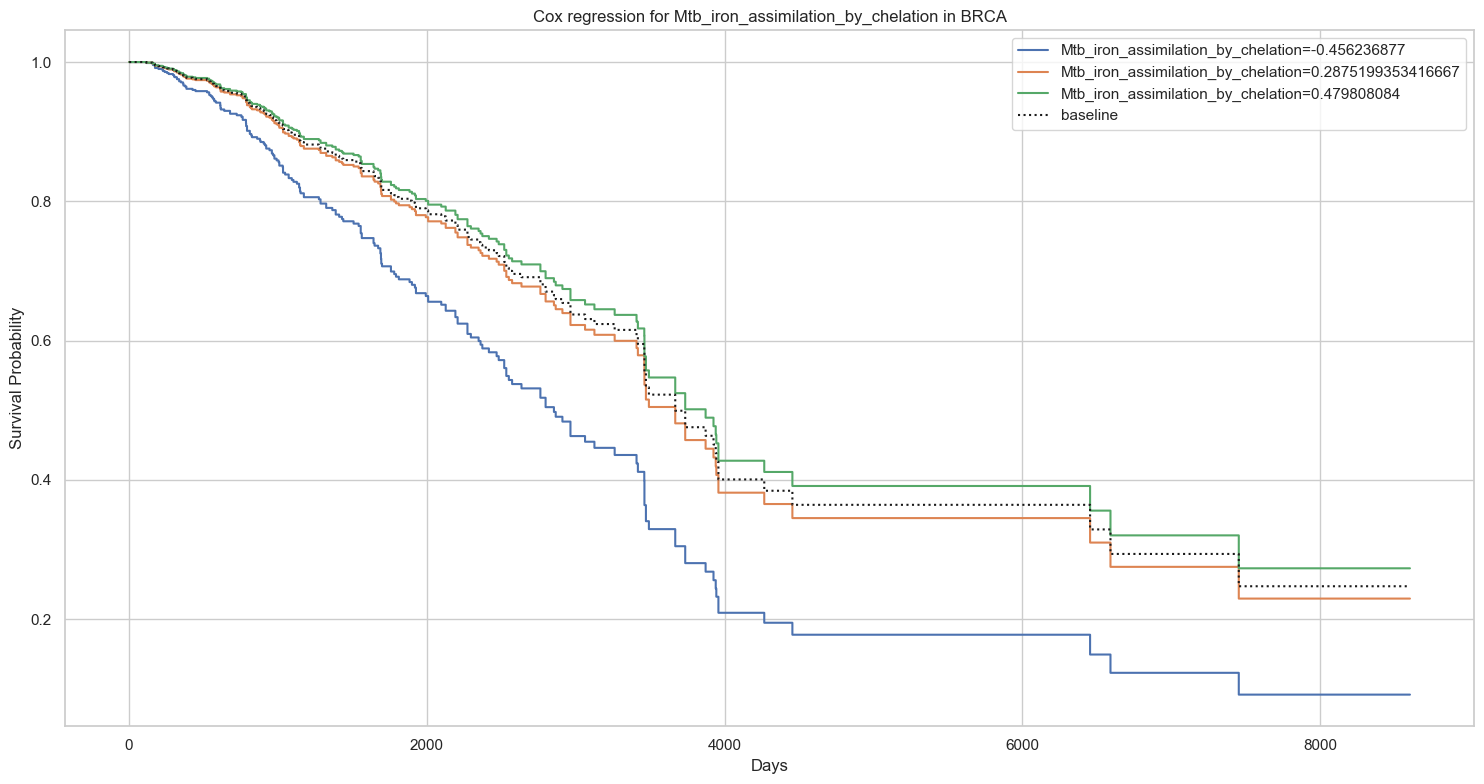

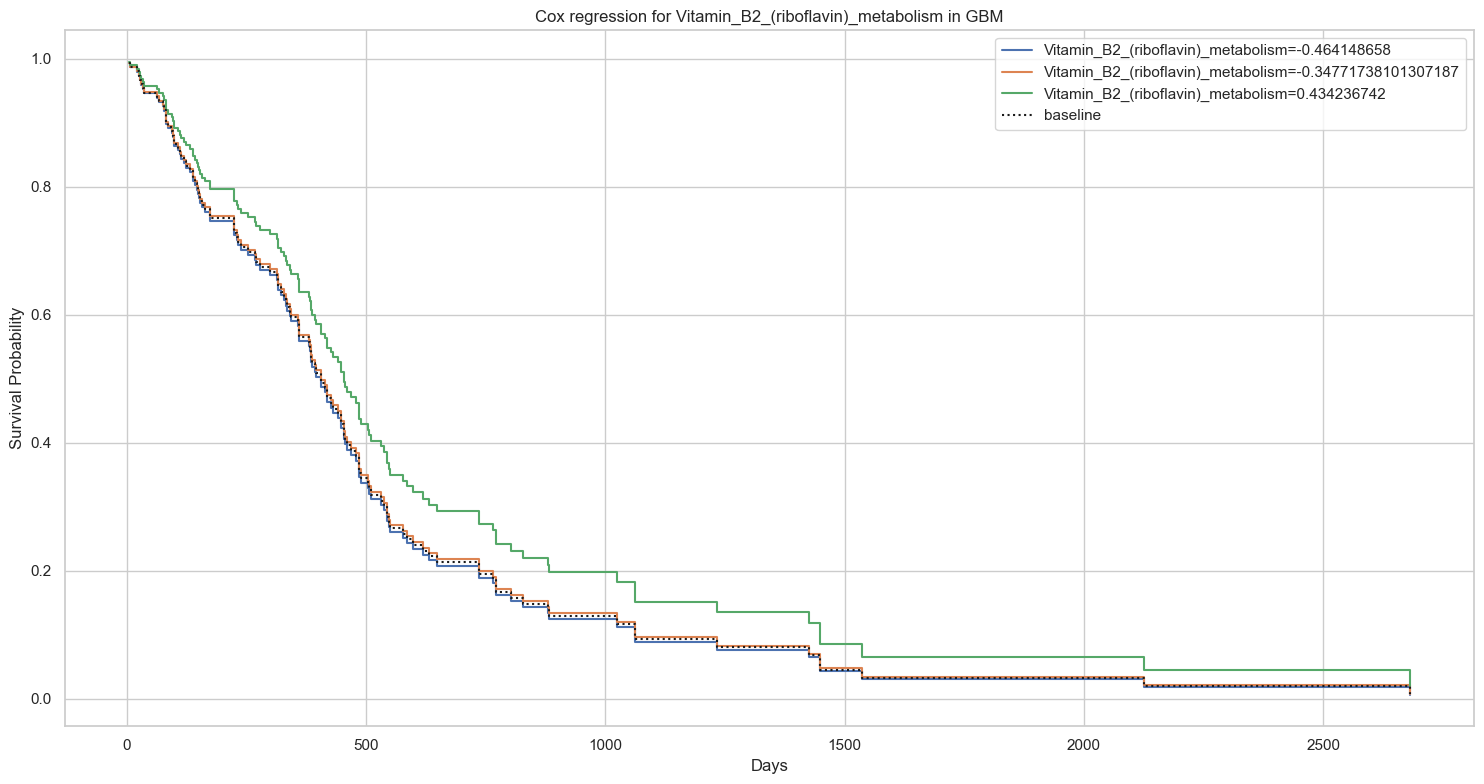

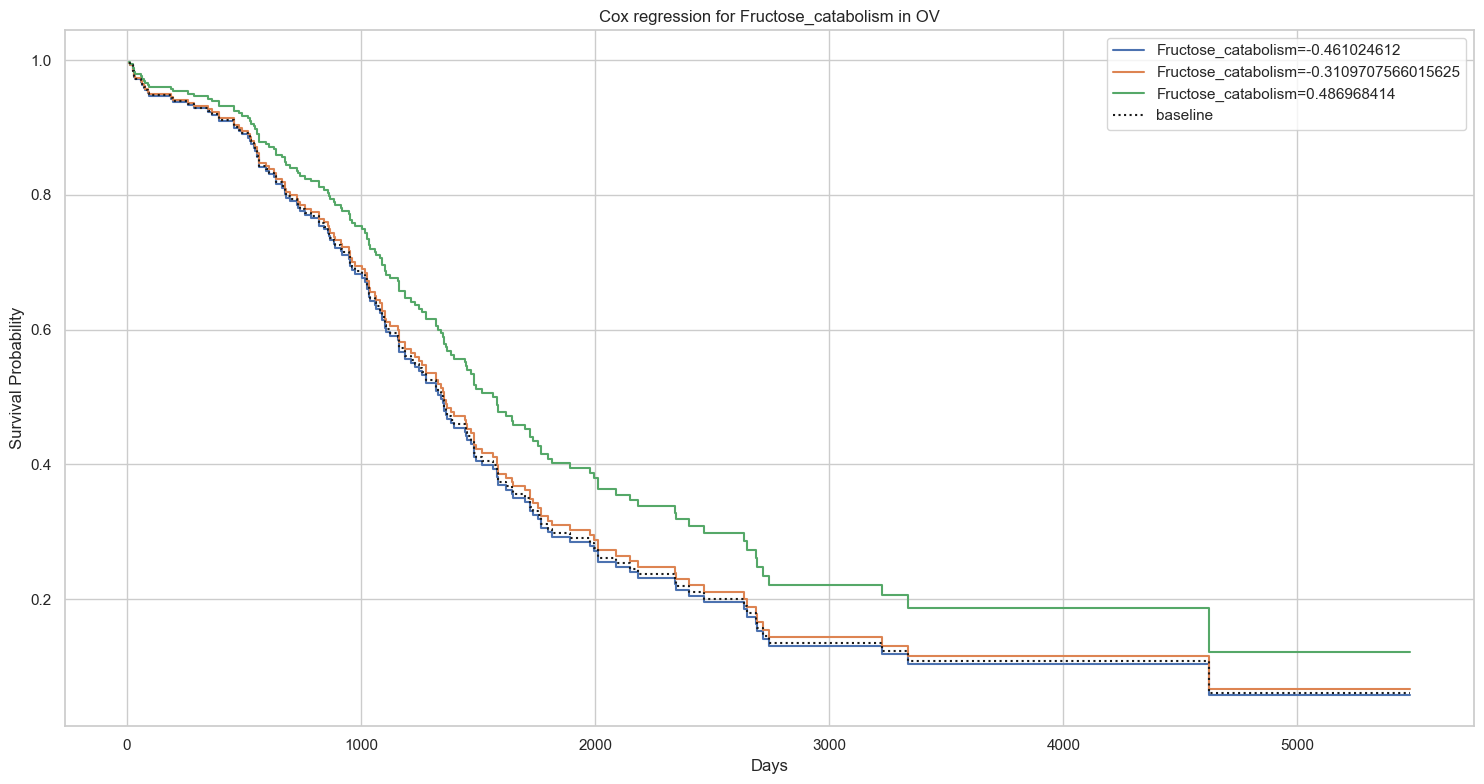

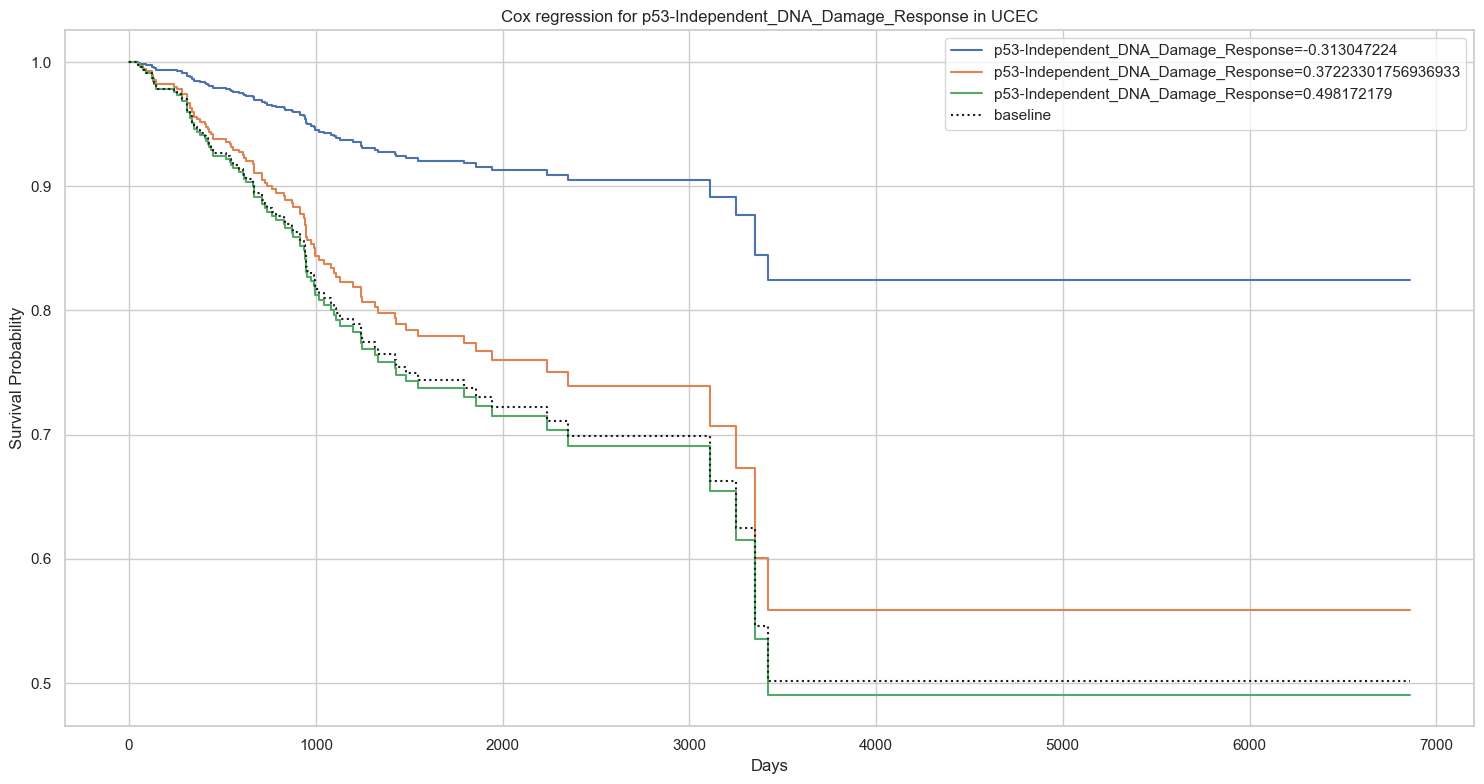

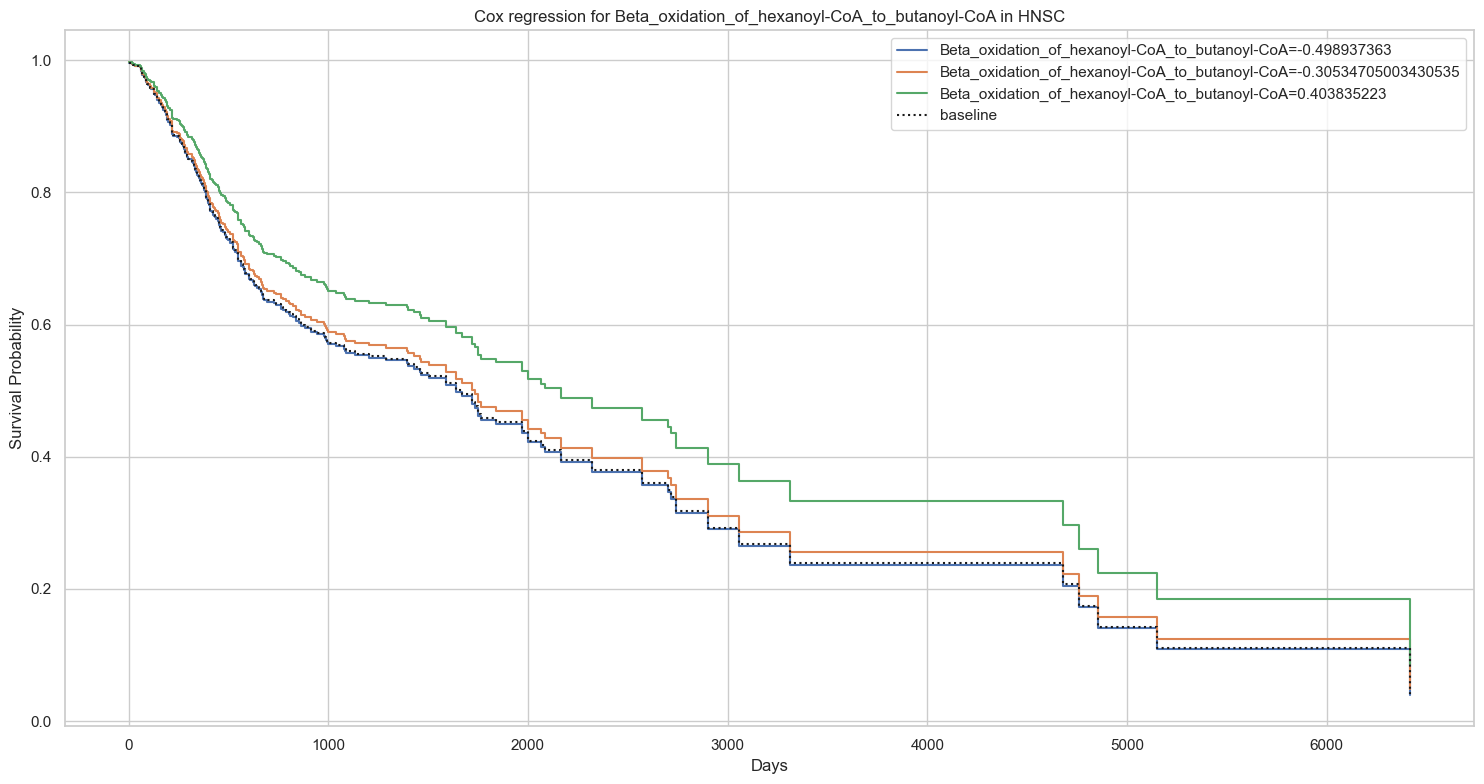

In [14]:
for cancer_type in cancer_types_to_evaluate:
    print("Cancer Type:", cancer_type, "\n")
    cox_regression_on_worst_pathway(cancer_type, df3)

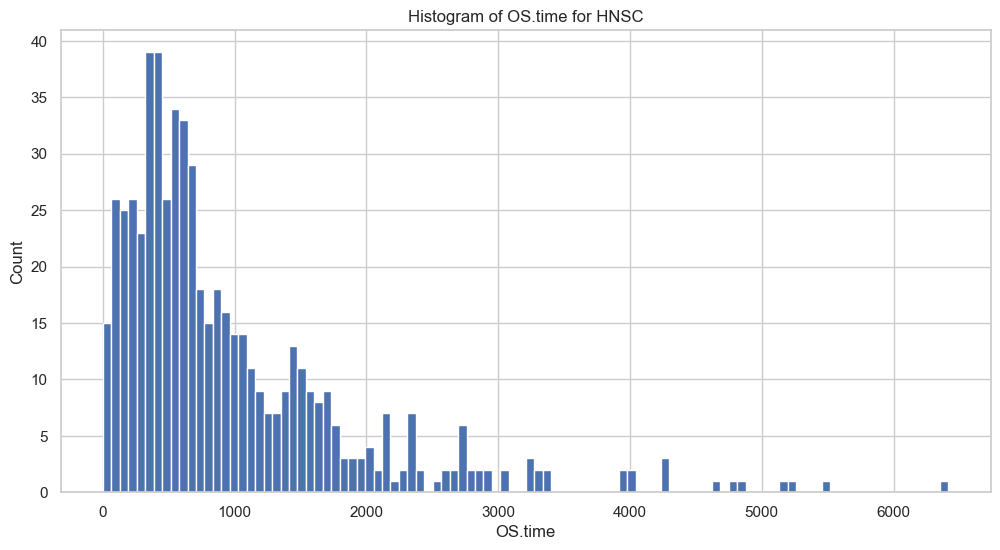

In [15]:
#plot the bar graph of os time for hnsc. Vary x axis from 0 to 7000.
cancer_type = 'HNSC'
cancer_data = df3[df3['cancer type abbreviation'] == cancer_type]
survival_columns = ['OS', 'OS.time']
survival_data = cancer_data[survival_columns]
survival_data = survival_data.dropna(subset=['OS', 'OS.time'])

#plot histogram of OS.time for HNSC
plt.figure(figsize=(12, 6))
plt.hist(survival_data['OS.time'], bins=100)
plt.title('Histogram of OS.time for HNSC')
plt.xlabel('OS.time')
plt.ylabel('Count')
plt.show()

